![](.2024-05-21-file-1.ipynb.upload/paste-0.525486487598134)


# Лабараторна робота №6
# Застосування numpy
## Невмержицька Дар'я ФБ-23
### Мета роботи: отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та градієнтного спуску.
### Хід роботи:


In [10]:
import numpy as np
import matplotlib.pyplot as plt

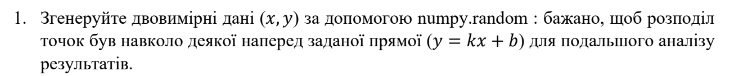

In [11]:
# Задаємо параметри прямої y = kx + b
k = float(input("Введіть значення k: "))
b = float(input("Введіть значення b: "))

Введіть значення k:  2

Введіть значення b:  1

In [12]:
# Генеруємо значення x
np.random.seed(42)  
num_points = int(input("Введіть кількість точок: ")) 
x = np.random.uniform(-10, 10, num_points)  # рівномірний розподіл значень x

Введіть кількість точок:  100

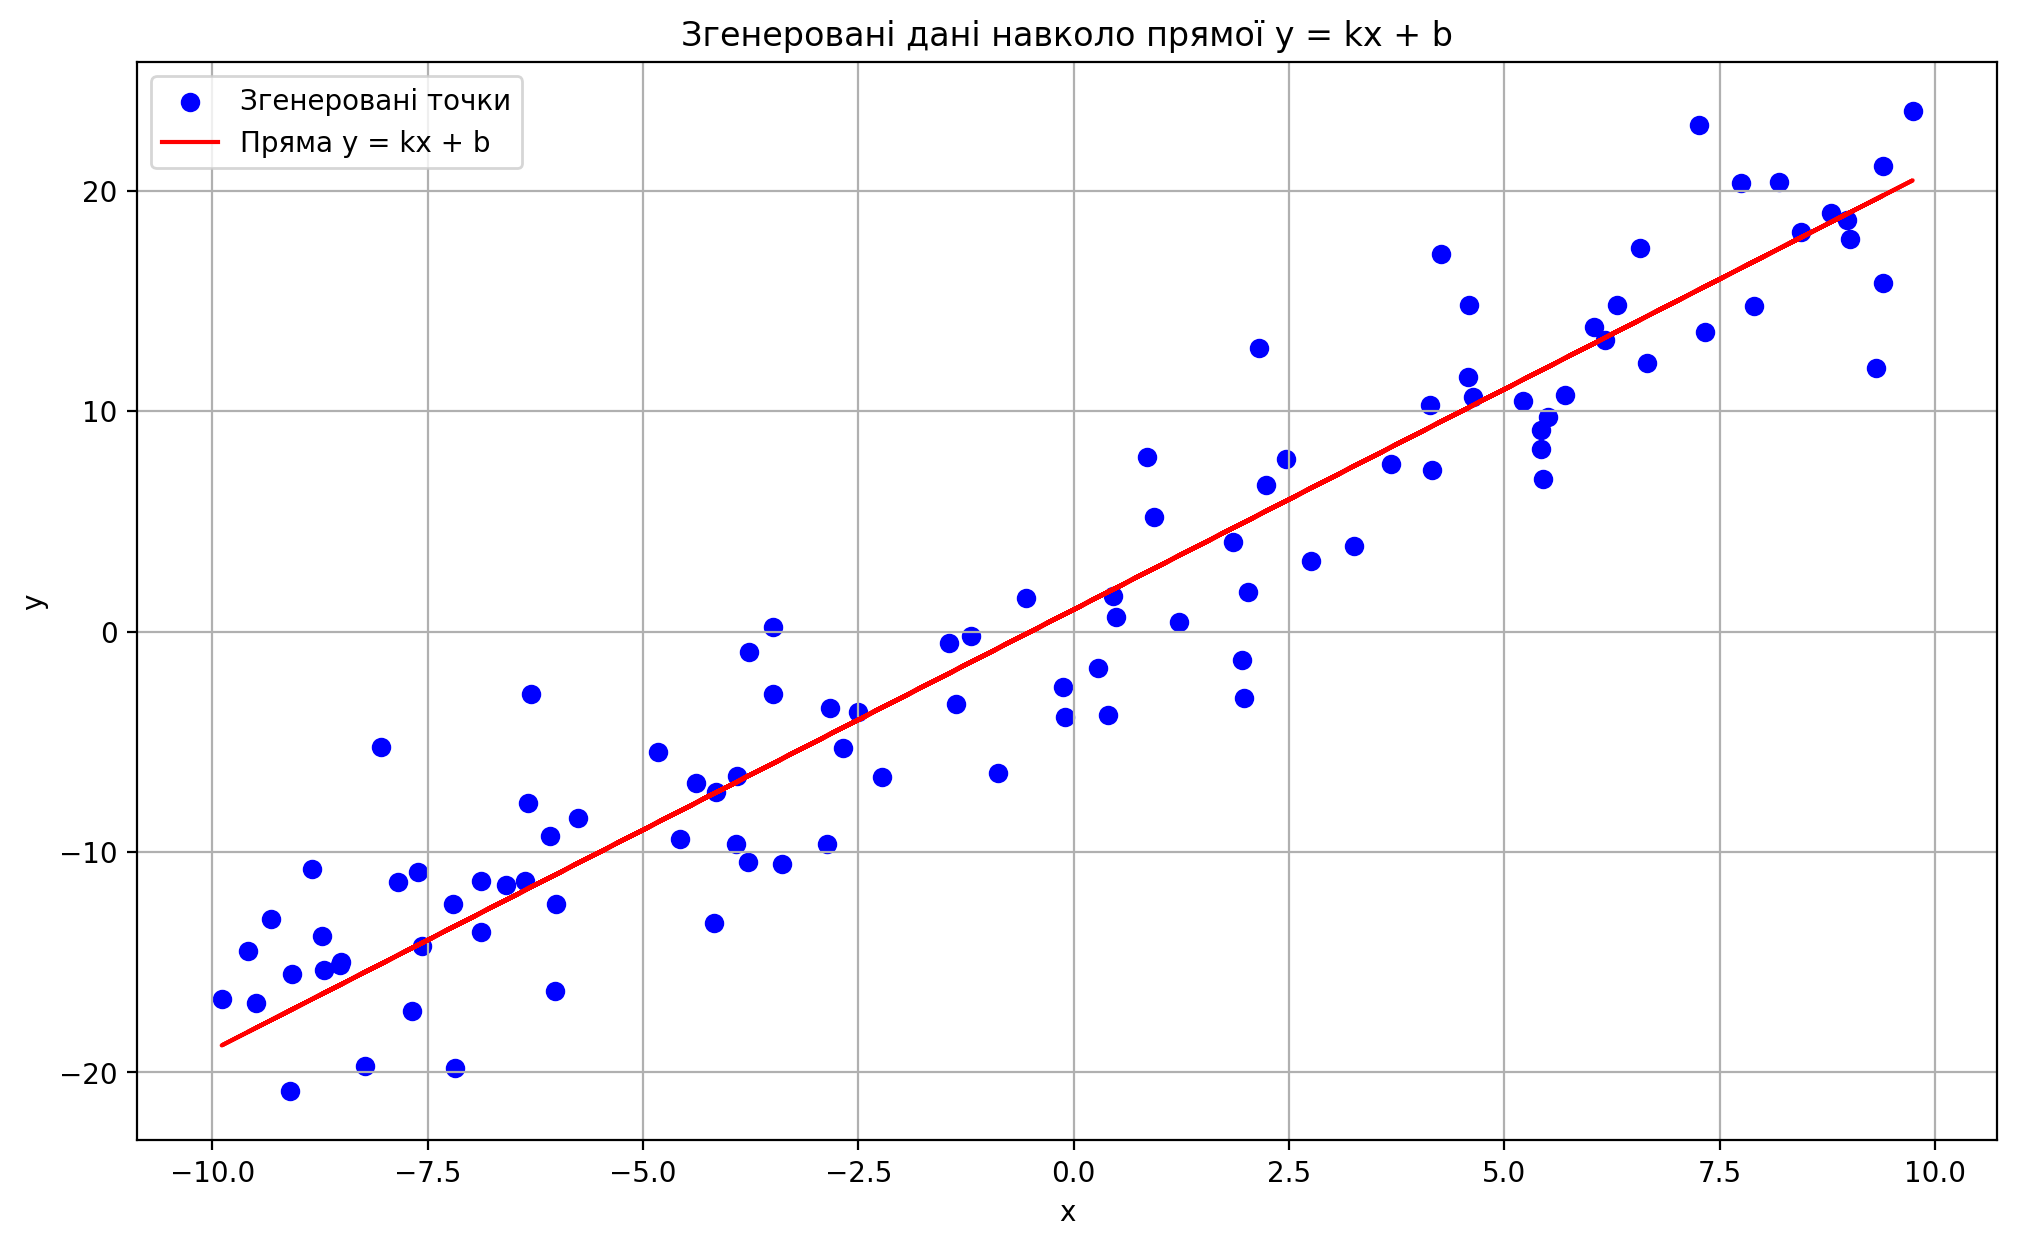

In [13]:
# Генеруємо значення y з шумом
noise = np.random.normal(0, 4, num_points)  
y = k * x + b + noise  # значення y навколо прямої y = kx + b з шумом

# Відображення результатів
plt.scatter(x, y, color='blue', label='Згенеровані точки')
plt.plot(x, k * x + b, color='red', label='Пряма y = kx + b')
plt.xlabel('x')
plt.ylabel('y')
# plt.axis('equal')
plt.grid()
plt.legend()
plt.title('Згенеровані дані навколо прямої y = kx + b')
plt.show()

![](.2024-05-21-file-1.ipynb.upload/paste-0.5313512608651676)


<img src=".2024-05-21-file-1.ipynb.upload/paste-0.003487026569218621" style="max-width:100%" />![](.2024-05-17-file-1.ipynb.upload/paste-0.3074335551102396)



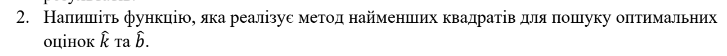

In [14]:
def least_squares(x, y):
    # Обчислюємо середні значення x та y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Обчислюємо коефіцієнти k та b за формулами методу найменших квадратів
    k = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x-x_mean) ** 2)
    b = y_mean - k * x_mean

    return k, b

In [15]:
k_ls, b_ls = least_squares(x, y)

![](.2024-05-21-file-1.ipynb.upload/paste-0.323538165592381)


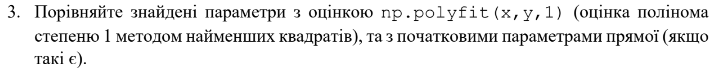

In [16]:
# Оцінка параметрів за допомогою np.polyfit
polyfit_params = np.polyfit(x, y, 1)
k_polyfit, b_polyfit = polyfit_params

In [17]:
print(f"Реальні параметри: k = {k}, b = {b}")
print(f"Параметри, знайдені методом найменших квадратів: k = {k_ls:.3f}, b = {b_ls:.3f}")
print(f"Параметри, знайдені за допомогою np.polyfit: k = {k_polyfit:.3f}, b = {b_polyfit:.3f}")

Реальні параметри: k = 2.0, b = 1.0
Параметри, знайдені методом найменших квадратів: k = 1.908, b = 0.941
Параметри, знайдені за допомогою np.polyfit: k = 1.908, b = 0.941


![](.2024-05-21-file-1.ipynb.upload/paste-0.4091409949795388)


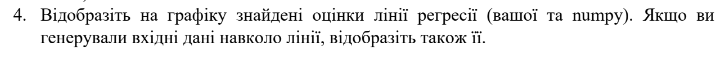

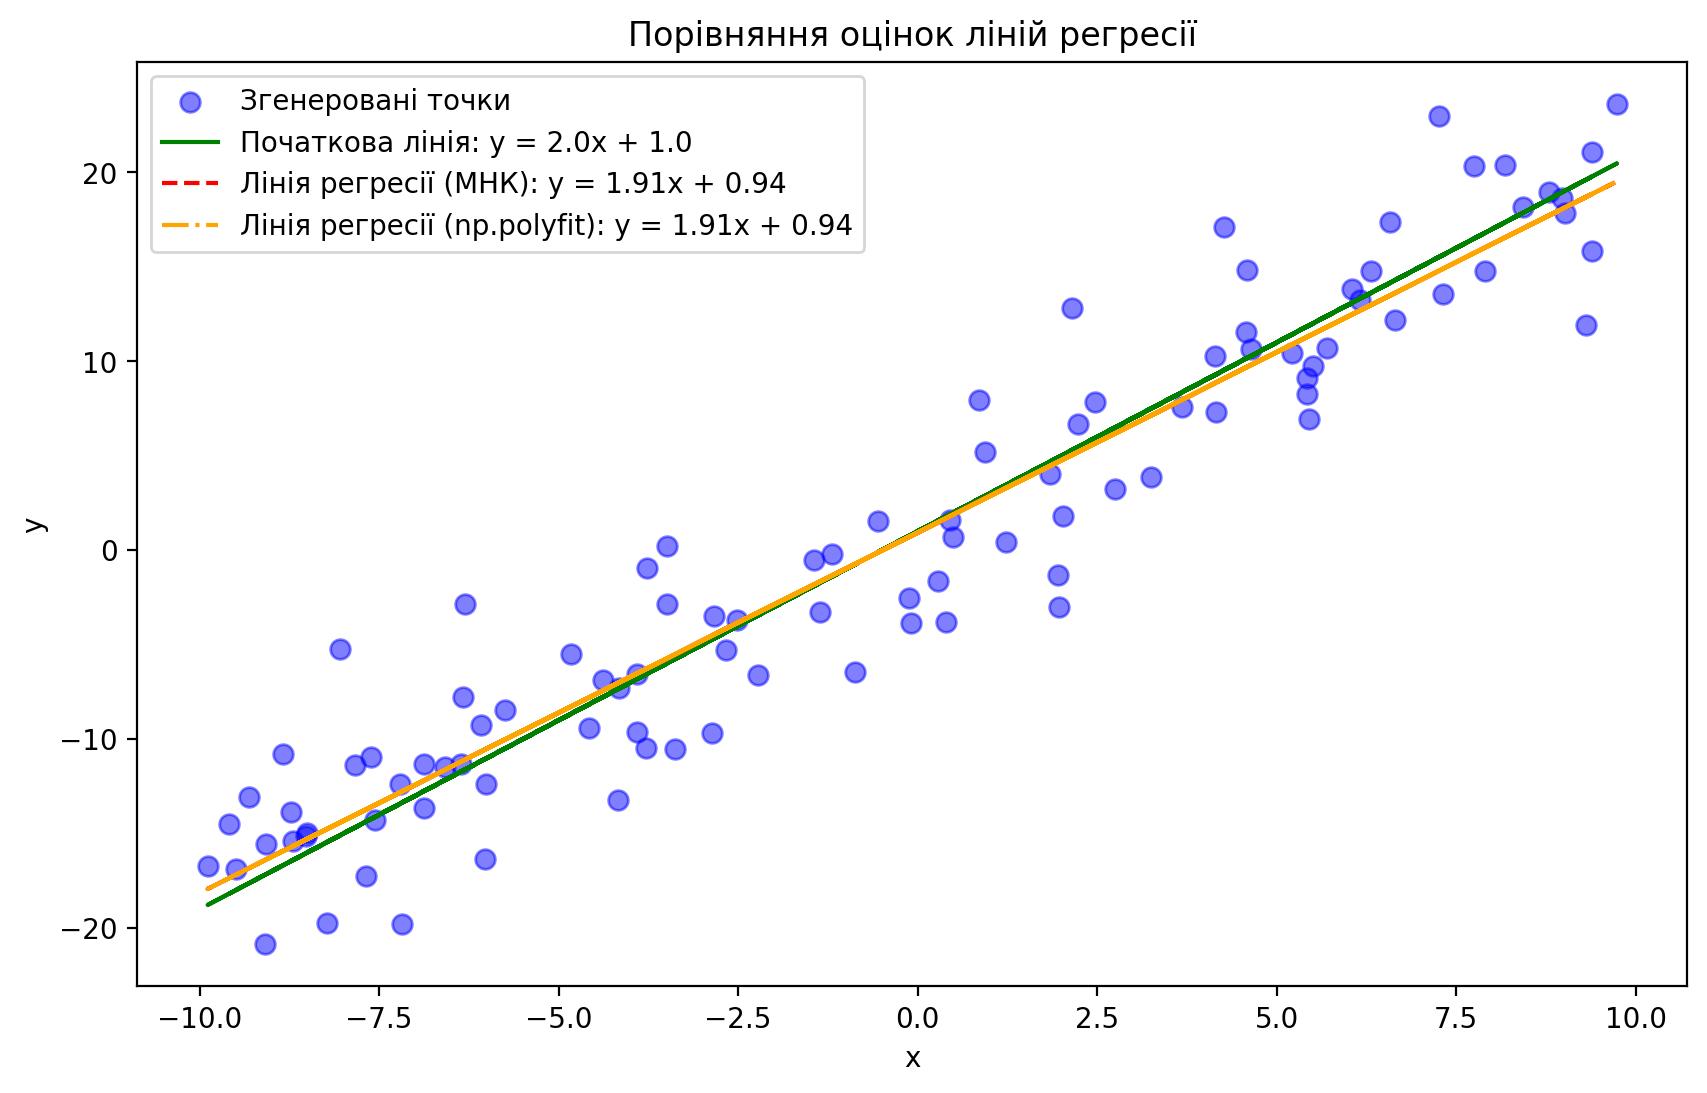

In [18]:
# Побудова графіку
plt.figure(figsize=(10, 6))

plt.scatter(x, y, color='blue', label='Згенеровані точки', alpha=0.5, s=50)
plt.plot(x, k * x + b, color='green', label=f'Початкова лінія: y = {k}x + {b}')
plt.plot(x, k_ls * x + b_ls, color='red', linestyle='--', label=f'Лінія регресії (МНК): y = {k_ls:.2f}x + {b_ls:.2f}')
plt.plot(x, k_polyfit * x + b_polyfit, color='orange', linestyle='-.', label=f'Лінія регресії (np.polyfit): y = {k_polyfit:.2f}x + {b_polyfit:.2f}')

# Налаштування графіку
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Порівняння оцінок ліній регресії')
plt.show()

#



# Градієнтний спуск



![](.2024-05-28-file-1.ipynb.upload/paste-0.8089260217825145)![](.2024-05-21-file-1.ipynb.upload/paste-0.28544798539630745)

![](.2024-05-21-file-1.ipynb.upload/paste-0.7144357384085758)



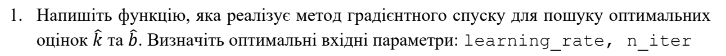

In [55]:
def gradient_descent(x, y, learning_rate, n_iter):
    beta_0 = 5
    beta_1 = 2
    errors = []
    
    for _ in range(n_iter):
        # Розрахунок прогнозів
        y_pred = beta_0 + np.dot(beta_1, x)
        
        # Розрахунок помилки 
        mse = np.mean((y_pred - y)**2)
        errors.append(mse)
 
        # Розрахунок часткових похідних
        d_loss_d_beta0 = -2/num_points*np.sum(y-y_pred)
        d_loss_d_beta1 = -2/num_points*np.sum(x*(y-y_pred))

        # Оновлення параметрів
        beta_0 -= learning_rate * d_loss_d_beta0
        beta_1 -= learning_rate * d_loss_d_beta1
    return beta_0, beta_1, errors

In [141]:
b_gd, k_gd, errors_gd = gradient_descent(x, y, learning_rate = 0.01, n_iter = 1000)

In [142]:
b_gd, k_gd

(0.9408381843771934, 1.9080453547216003)

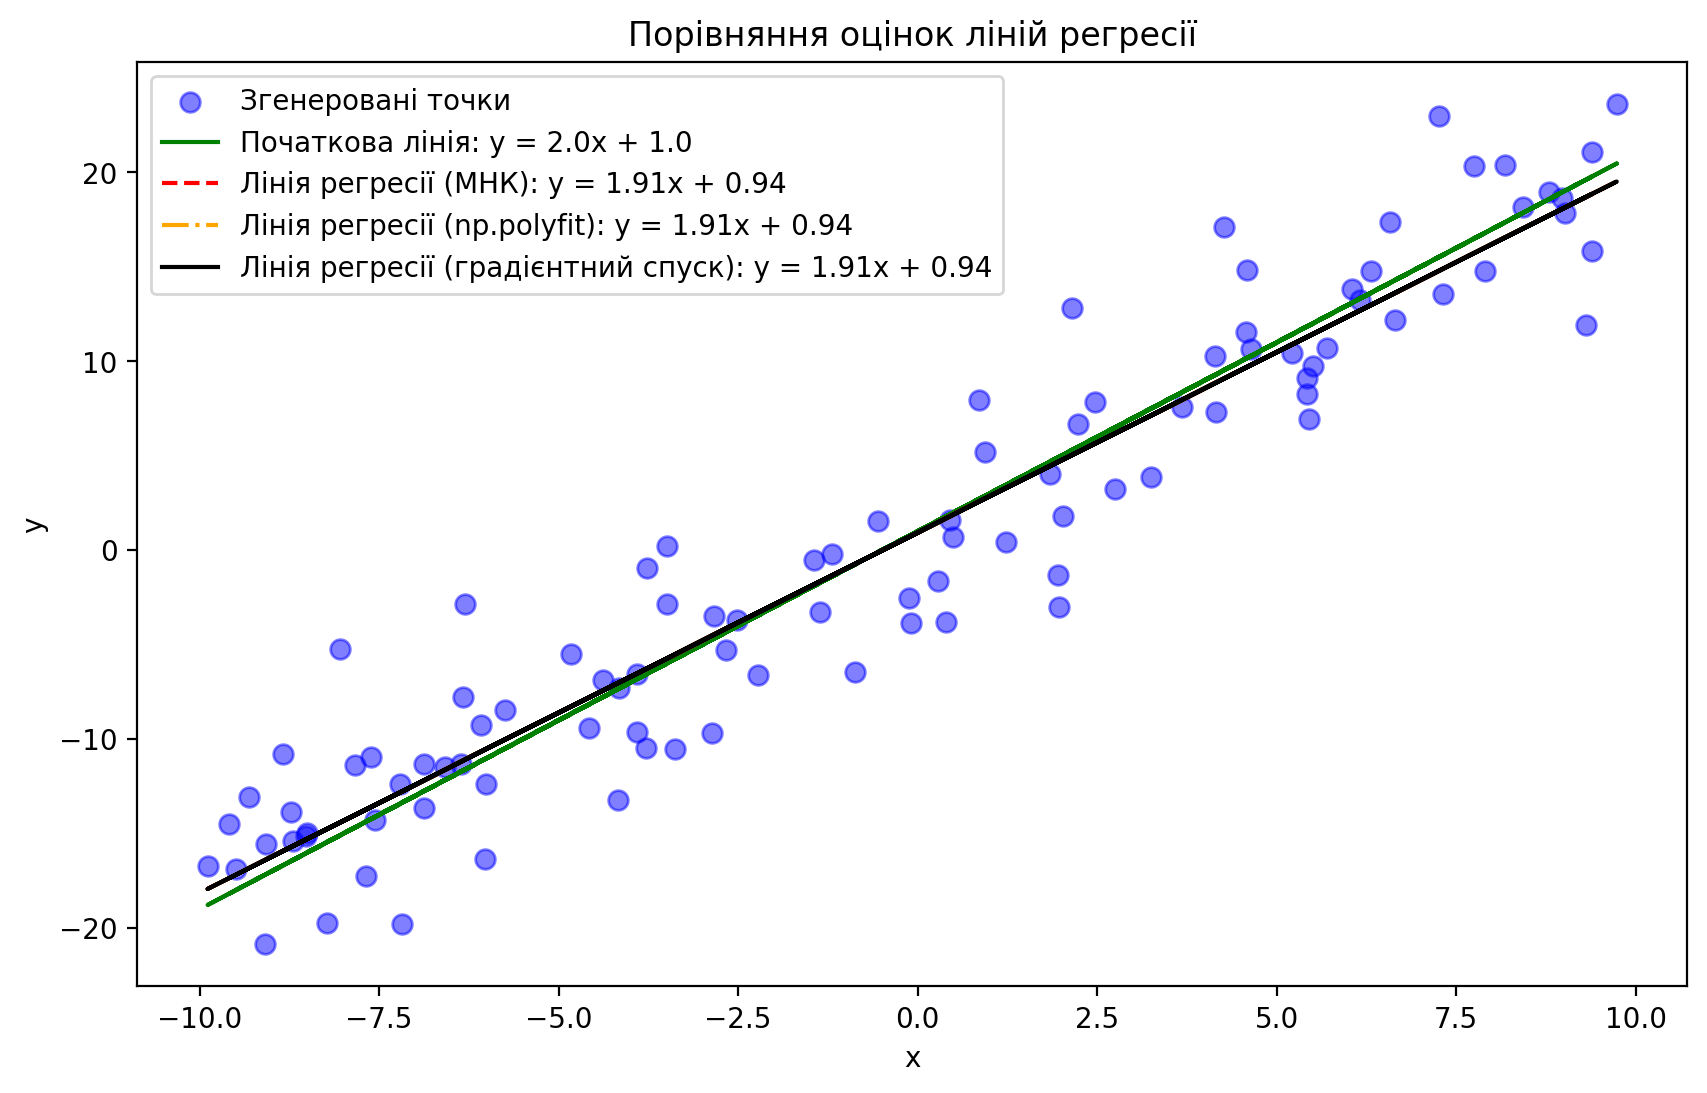

In [143]:
# Побудова графіку
plt.figure(figsize=(10, 6))

plt.scatter(x, y, color='blue', label='Згенеровані точки', alpha=0.5, s=50)
plt.plot(x, k * x + b, color='green', label=f'Початкова лінія: y = {k}x + {b}')
plt.plot(x, k_ls * x + b_ls, color='red', linestyle='--', label=f'Лінія регресії (МНК): y = {k_ls:.2f}x + {b_ls:.2f}')
plt.plot(x, k_polyfit * x + b_polyfit, color='orange', linestyle='-.', label=f'Лінія регресії (np.polyfit): y = {k_polyfit:.2f}x + {b_polyfit:.2f}')
plt.plot(x, k_gd * x + b_gd, color='black', label=f'Лінія регресії (градієнтний спуск): y = {k_gd:.2f}x + {b_gd:.2f}')

# Налаштування графіку
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Порівняння оцінок ліній регресії')
plt.show()

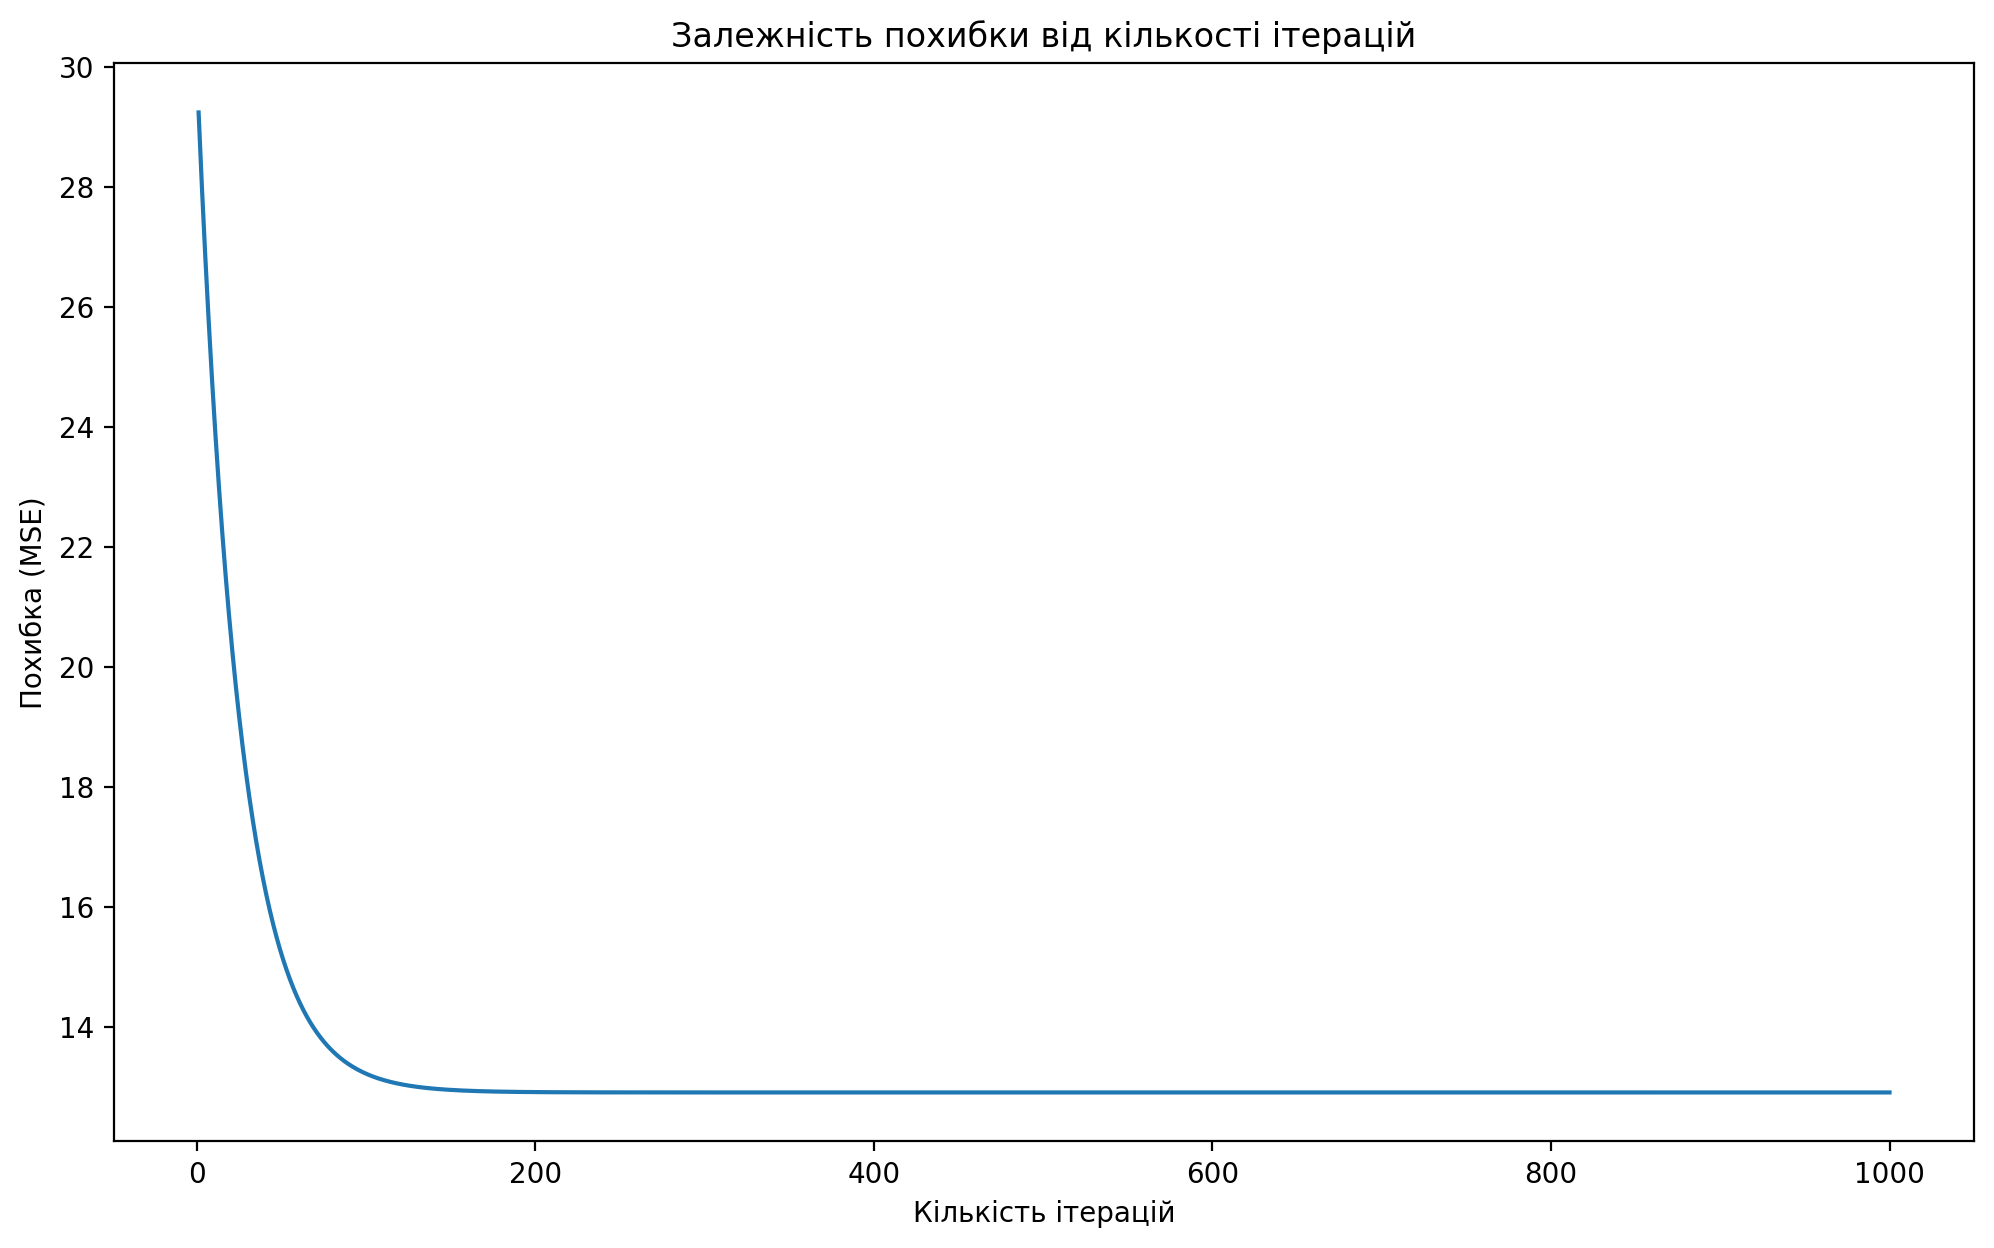

In [144]:
plt.plot(range(1, len(errors_gd) + 1), errors_gd)
plt.xlabel("Кількість ітерацій")
plt.ylabel("Похибка (MSE)")
plt.title("Залежність похибки від кількості ітерацій")
plt.show()